# 01 - Feedforward Neural Networks
---

### **Introduction to Neural Networks**
One of the most powerful types machine learning algorithm is the neural network, capable of fitting extremely complex shapes to higher dimensional data. This makes them very useful for a wide variety of tasks from simpler regression and classification problems to more complex tasks involving images, audio, natural language and more. 

At a basic level, neural networks are made up of nodes connected by edges. They are organised into the following layers:
- **Input Layer**: One or more nodes representing the input data
- **Hidden Layer(s)**: Groups of nodes arranged in vertical layers which transform the data
- **Output Layer**: One or more nodes representing the output (i.e prediction)
![Neural Network Architecture](../images/neural_network.png)
Simple neural networks are usualyl **fully connected** meaning every node in a layer is connected to every node in the next layer.

Each edge is associated with a **weight** and a **bias** which are parameters which we use to transform the output value from the previous node via 

$$
output value * weight + bias
$$

The weights and biases are estimated using a method called **back propagation**. 

Each node within the hidden layer(s) is associated with an activation function which is used to transform the input value to an output value to be combined with the weights and biases. Common activation functions are:
- Soft Plus: $f(x) = log(1 + e^x)$
- Rectified linear unit (ReLU): $f(x) = max(0, x)$
- Sigmoid:  $f(x) = \frac{1}{1+e^{-x}}$

These functions are plotted below.

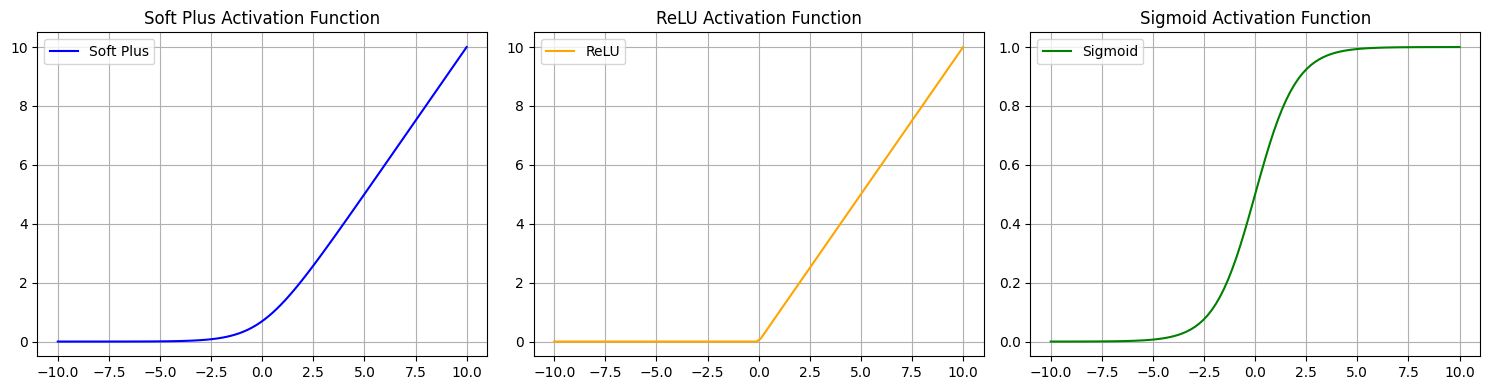

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

# Soft Plus
y_soft_plus = np.log(1 + np.exp(x))

# ReLU
y_relu = np.maximum(0, x)

# Sigmoid
y_sigmoid = 1 / (1 + np.exp(-x))

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

ax1.plot(x, y_soft_plus, label='Soft Plus', color='blue')
ax1.set_title('Soft Plus Activation Function')
ax1.legend()
ax1.grid()

ax2.plot(x, y_relu, label='ReLU', color='orange')
ax2.set_title('ReLU Activation Function')
ax2.legend()
ax2.grid()

ax3.plot(x, y_sigmoid, label='Sigmoid', color='green')
ax3.set_title('Sigmoid Activation Function')
ax3.legend()
ax3.grid()

plt.tight_layout()
plt.show()

### **Back Propagation**
In order to fit a neural network to data we need to estimate the parameters (i.e. the weights and biases). The specific activation functions used as well as the number of layers and neurons in each layer are refered to as the **architecture** of the neural network. Deciding on the best architecture is something of and art rather than a science. Different model architectures are tested via cross-validation rather than being determined as part of the model fitting process. To estimate the parameters we use an algorithm called **back propagation** which is essentially just a specific implementation of gradient decent. We start by estimating the parameters closest to the output layer and move backwards through the model to estimate the parameters closest to the input layer. 

The steps to back propagation are as follows:
1. Initialise all weights and biases (typically set them all weights to 1 and biases to 0)
2. Start with the right-hand most parameters which have not yet been estimated (e.g. initial the weights and biases that connect to the output layer)
3. Use gradient decent to estimate the parameter (bias first, then weight)
    - Differentiate the loss function (e.g. RSS for regression) with respect to the parameter
    - Compute the derivative of the loss function at the current estimate of the parameter
    - Mulitply this derivative by the learning rate to get the step size
    - Compute the new estimate (current estimate - step size)
4. Once all weights and biases in the layer have been estimated, move to the previous layer and repeat steps 2 and 3
5. Repeat until all weights and biases have been estimated

The algorithm is called back propagation because the parameters towards the end of the neural network are estimated first. These estimates are then propagated backwards to the earlier parameters in the model. 

### **Regularisation**

Neural networks are advanced models capable of fitting complex shapes to data in many dimensions. As such, they are prone to overfitting. **Regularisation** refers to techniques designed to limit overfitting. The two most common approaches both work by adding to the loss function a regularisation term which is a function of the weights. This forces the algorithm to not allow one weight (and therefore one feature) to dominate the prediction and instead use a combination of all the features. Often, this results in a more generalisable model.

The two main approaches are **L1-regularisation (Lasso)** and **L2-regularisation (Ridge)** and differ in the term they add to the loss function:
- **Lasso**: $\sum |w_i|$
- **Ridge**: $\sum w_i^2$
for weights $w_i$

Lasso regularisation pushes some weights to zero so implicitly does feature selection. Ridge regularisation is much more common in practice as it rarely pushes weights to exactly zero and strongly penalises very large weights. 

Another form of regularisation is the use of a **dropout layer**. Instead of penalising weights as with Lasso and Ridge regularisation, a dropout layer randomely removes a certain proportion of neurons during training. So at each training step some of the neurons are deactivated by setting the activation functions to always return 0. Note that this is just for training and all neurons are activated for inference. Dropout layers force the neural network to not depend on a single pathway to make predictions and instead balance the learning across the network. In a way, this can be thought of as an ensemble method where we train many smaller neural networks and average the results. 


### **Convolutional Neural Networks**
Simple feedforward neural networks as described above are excellent at working with tabular data which has no spatial quality. We could reorder the columns of the data and retrain the model without affecting the quality of the predictions. However, some types of data such as images, video and audio have a strong spatial quality. A greyscale image for instance is typically represented as a vector of numbers reprenting the intensity at each pixel. Rearranging the order here changes what the image represents - so the order is highly important. Simple feedforward neural networks fail to capture this spatial quality of such data. **Convolutional neural networks (CNNs)** are a specific type of feedforward neural network which are designed to work more effectively with spatial data. CNNs work by applying convolutional layers and pooling layers before fully conected layers close to the output layer. 

Convolutional layers apply small learnable filters (called kernels) that slide across the input to detect patterns. For example, suppose we have a 256x256 pixel image, we could create a 3x3 kernel

$$
\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1
\end{bmatrix}
$$

We take each 3x3 region and multiply it by the kernel to produce a 2-d feature map. Convolutional layers are used to detect small reusable patterns that can be built up into complex objects. For example a kernel might detect edges or corners in an image which are combined later in the model to detect more complex shapes. The benefit of this approach is that if the subject in the image is translated, the kernel can still detect the pattern. 

Pooling layers are not learning layers; they have no parameters to train. Instead they are aggregation/simnplification layers which work by grouping of pixels together and summarising them. For example a 3x3 square of pixels could be aggregated into a single pixel by taking the average. This reduces the resolution of the image gradually and results in much fewer weights and parameters than a simple feedforward neural network. Having fewer parameters can help to reduce overfitting. 

Generally CNNs alternate between convolutional and pooling layers (possibly multiple times) before having a fully connected neural network (again possibly with multiple layers) feeding into the output. 